---
# Running initialization functions and imports
---

In [1]:
import gc

gc.collect()

0

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sciStat
import pandas as pd
from IPython.display import clear_output
import sys
import rich
import pickle
import os

import xobjects as xo
import xtrack as xt
import xpart as xp
import xfields as xf

sys.path.append('/home/phbelang/abp/BBStudies/')
# Linux local
sys.path.append('/home/pbelanger/ABPlocal/BBStudies')
# Mac local
sys.path.append('/Users/pbelanger/ABPLocal/BBStudies/')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as dtune
import BBStudies.Physics.Base as phys
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Constants as cst


from init_functions import Allconfigs,load_tracked,sum_footprints, octupole_footprint,import_from_lines
display(Allconfigs)




FIGPATH  = 'TeX/Figures/'
FIG_W = 8
FIG_H = 6

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times New Roman"
})

AllTracked = {}
for line_ID in Allconfigs.index:
    AllTracked[line_ID] = load_tracked(line_ID)

def template_FP_plot(window = 0.004,show_WP = True,show_Res = True):

    Qx_0,Qy_0 = 0.31, 0.32
    Qx_lim    = [Qx_0-4*window/6,Qx_0+2*window/6]
    Qy_lim    = [Qy_0-4*window/6,Qy_0+2*window/6]

    if show_Res:
        bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,offset = [-Qx_0,-Qy_0],alpha=0.15,color='grey')
    if show_WP:
        h1, = plt.plot([0],[0],'P',color='C3',alpha=0.8)


    plt.axis('square')
    plt.xlim(np.array(Qx_lim)-Qx_0)
    plt.ylim(np.array(Qy_lim)-Qy_0)


    plt.xlabel(rf'$\Delta Q_x$',fontsize=16)
    plt.ylabel(rf'$\Delta Q_y$',fontsize=16)


def adjust_fontsize(fontsize=15):
    for item in ([plt.gca().title, plt.gca().xaxis.label, plt.gca().yaxis.label] +
                 plt.gca().get_xticklabels() + plt.gca().get_yticklabels()):
        item.set_fontsize(fontsize)

    if plt.gca().get_legend() is not None:
        for item in plt.gca().get_legend().get_texts():
            item.set_fontsize(fontsize)

def adjust_subplots():
    plt.subplots_adjust(left   = None,  # the left side of the subplots of the figure
                        right  = None,    # the right side of the subplots of the figure
                        bottom = None,    # the bottom of the subplots of the figure
                        top    = None,    # the top of the subplots of the figure
                        wspace = 0.001,    # the amount of width reserved for blank space between subplots
                        hspace = 0.001)    # the amount of height reserved for white space between subplots


def reverse_legend():
    handles, labels = plt.gca().get_legend_handles_labels()

    #specify order of items in legend
    order = np.arange(len(labels))[::-1]

    #add legend to plot
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])


,config,Energy,I_bbcw,I_oct,Nb,emitt_strong,emitt_weak,xing
line_ID,,,,,,,,
base,Configs/config_base.yaml,6800,350,430,1.4e11,2.3,2.3,160
base_strong_01,Configs/config_strong_01.yaml,6800,350,430,1.4e11,1.9,2.3,160
base_strong_02,Configs/config_strong_02.yaml,6800,350,430,1.4e11,2.1,2.3,160
base_strong_03,Configs/config_strong_03.yaml,6800,350,430,1.4e11,2.3,2.3,160
base_strong_04,Configs/config_strong_04.yaml,6800,350,430,1.4e11,2.5,2.3,160
base_weak_01,Configs/config_base.yaml,6800,350,430,1.4e11,2.3,1.9,160
base_weak_02,Configs/config_base.yaml,6800,350,430,1.4e11,2.3,2.1,160
base_weak_03,Configs/config_base.yaml,6800,350,430,1.4e11,2.3,2.3,160
base_weak_04,Configs/config_base.yaml,6800,350,430,1.4e11,2.3,2.5,160


---
# Weak-Strong setup
---

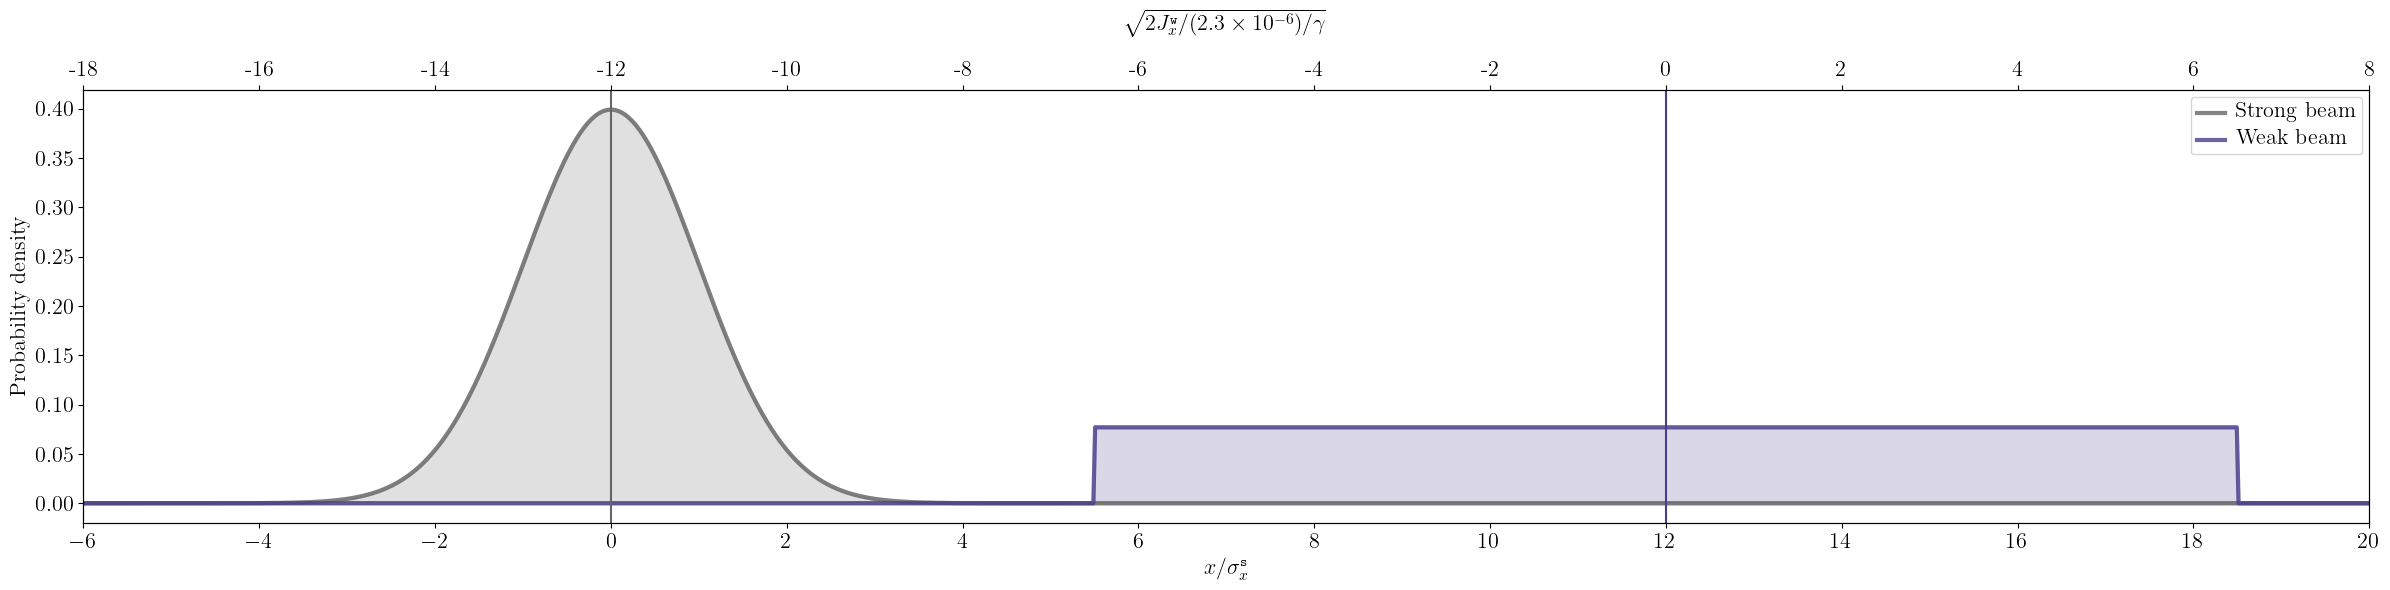

In [70]:

x   = np.linspace(-10,30,2000)

dist_strong = sciStat.norm.pdf(x,loc=0,scale=1)
center_w = 12
sigma_w  = 6.5
dist_weak   = sciStat.uniform.pdf(x,loc = center_w - sigma_w,scale= 2*sigma_w) 

plt.figure(figsize=(3*FIG_W,FIG_H))

plt.fill_between(x,dist_strong, color= '0.4',lw=3,alpha=0.2)
plt.fill_between(x,dist_weak  , color= 'darkslateblue',lw=3,alpha=0.2)
plt.plot(x,dist_strong,label='Strong beam', color= '0.4',lw=3,alpha=0.8)
plt.plot(x,dist_weak  ,label='Weak beam'  , color= 'darkslateblue',lw=3,alpha=0.8)
plt.axvline(0,color='0.4')
plt.axvline(center_w,color='darkslateblue')


plt.legend()
plt.xticks(np.arange(-6,22,2))
plt.xlim([-6,20])
plt.xlabel(r'$x/\sigma_x^\texttt{{\normalsize s}}$')
plt.ylabel(r'Probability density')
adjust_fontsize(fontsize=16)

ax2 = plt.gca().twiny()
plt.xticks(np.arange(-6,22,2),labels=np.arange(-6,22,2)-center_w)
plt.xlim([-6,20])
plt.xlabel(r'$\sqrt{2J_x^\texttt{{\normalsize w}}/(2.3\times 10^{-6})/\gamma}$'+'\n')
adjust_fontsize(fontsize=16)
plt.tight_layout()
plt.savefig('TeX/Figures/weak_strong_setup.pdf',bbox_inches='tight',format='pdf')



---
# Mapping
---

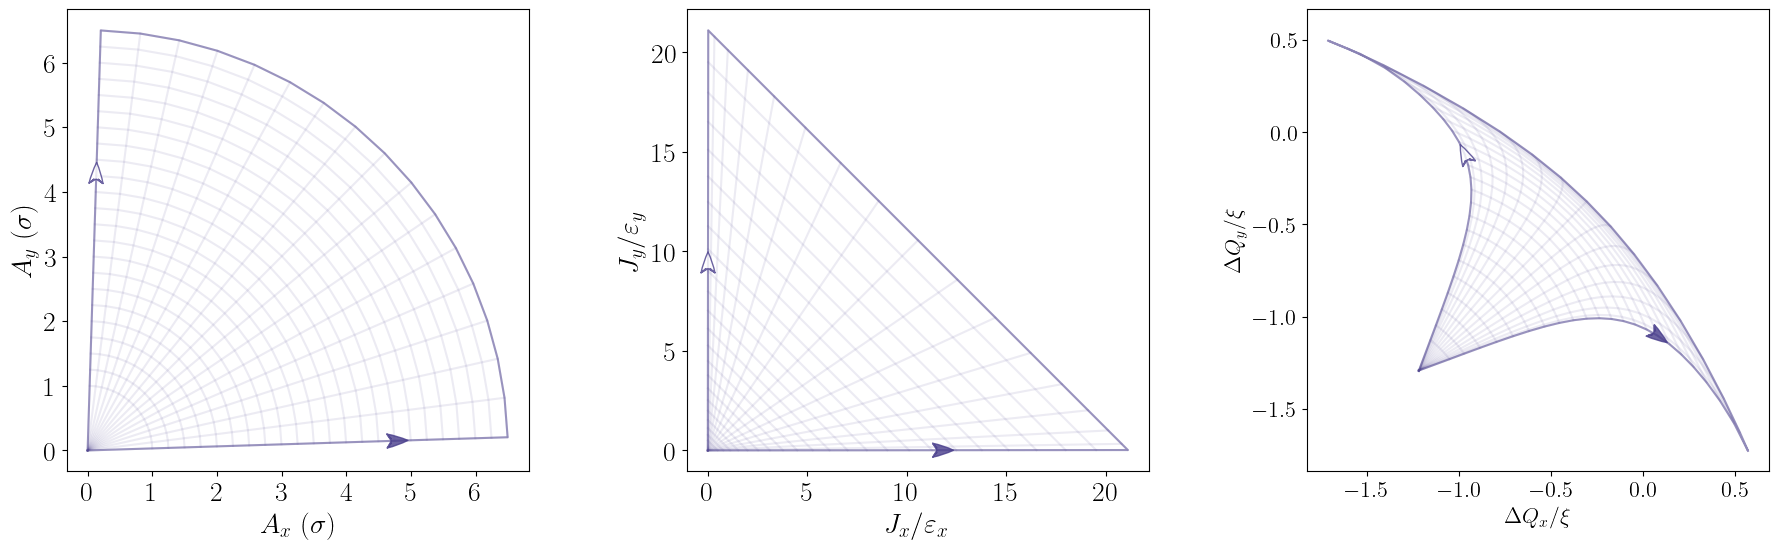

In [71]:
line_ID = 'base'
tracked = load_tracked(line_ID )

fig, axes = plt.subplots(1, 3,figsize=(3*FIG_W,FIG_H))


color = 'darkslateblue'

# FIRST AXIS
#===========================
plt.sca(axes[0])
#------------
x = tracked['coord']['x_sig']
y = tracked['coord']['y_sig']
#------------
bbplt.polarmesh(x,y,alpha=0.1,r=tracked['coord']['r_sig'],theta=tracked['coord']['theta_sig'],color=color)
#plt.scatter(x,y,c=color,s = 30*sciStat.norm.pdf(tracked['coord']['r_sig'])/sciStat.norm.pdf(0))
x = x.loc[tracked['ctour_idx']]
y = y.loc[tracked['ctour_idx']]
plt.plot(x,y,'-',alpha=0.5,color=color)
start,stop = (len(x))//4,(len(y))//4+3
bbplt.drawArrow(x.values[start:stop],y.values[start:stop],scale=2.5,color=color,alpha=0.8,label = None,zorder=100)
start,stop = 3*(len(x))//4,3*(len(y))//4+3
bbplt.drawArrow(x.values[start:stop][::-1],y.values[start:stop][::-1],scale=2.5,facecolor='white',color=color,alpha=0.8,label = None,zorder=100)


plt.axis('square');
plt.xlabel(r'$A_x$ ($\sigma$)')
plt.ylabel(r'$A_y$ ($\sigma$)')
adjust_fontsize(fontsize=20)
#===========================


# Second AXIS
#===========================
plt.sca(axes[1])
#------------
x = (tracked['coord']['x_sig'])**2/2
y = (tracked['coord']['y_sig'])**2/2
#------------
bbplt.polarmesh(x,y,alpha=0.1,r=tracked['coord']['r_sig'],theta=tracked['coord']['theta_sig'],color=color)
#plt.scatter(x,y,c=color,s = 30*sciStat.norm.pdf(tracked['coord']['r_sig'])/sciStat.norm.pdf(0))
x = x.loc[tracked['ctour_idx']]
y = y.loc[tracked['ctour_idx']]
plt.plot(x,y,'-',alpha=0.5,color=color)
start,stop = (len(x))//4,(len(y))//4+3
bbplt.drawArrow(x.values[start:stop],y.values[start:stop],scale=2.5,color=color,alpha=0.8,label = None,zorder=100)
start,stop = 3*(len(x))//4,3*(len(y))//4+3
bbplt.drawArrow(x.values[start:stop][::-1],y.values[start:stop][::-1],scale=2.5,facecolor='white',color=color,alpha=0.8,label = None,zorder=100)

plt.axis('square');
plt.xlabel(r'$J_x/\varepsilon_x$')
plt.ylabel(r'$J_y/\varepsilon_y$')
adjust_fontsize(fontsize=20)
#===========================


# THIRD AXIS
#===========================
plt.sca(axes[2])
#------------
dQx,dQy = sum_footprints(tracked,components = ['HO','LR'])
xi = float(Allconfigs.loc[line_ID,'Nb'])*cst.r_p/(4*np.pi*(1e-6*float(Allconfigs.loc[line_ID,'emitt_weak'])))
x = dQx/xi
y = dQy/xi
#------------
#template_FP_plot(window = 0.02,show_WP=False,show_Res=False)
bbplt.polarmesh(x,y,alpha=0.1,r=tracked['coord']['r_sig'],theta=tracked['coord']['theta_sig'],color=color)
#plt.scatter(x,y,c=color,s = 30*sciStat.norm.pdf(tracked['coord']['r_sig'])/sciStat.norm.pdf(0))
x = x.loc[tracked['ctour_idx']]
y = y.loc[tracked['ctour_idx']]
plt.plot(x,y,'-',alpha=0.5,color=color)
start,stop = (len(x))//4,(len(y))//4+3
bbplt.drawArrow(x.values[start:stop],y.values[start:stop],scale=2.5,color=color,alpha=0.8,label = None,zorder=100)
start,stop = 3*(len(x))//4,3*(len(y))//4+3
bbplt.drawArrow(x.values[start:stop][::-1],y.values[start:stop][::-1],scale=2.5,facecolor='white',color=color,alpha=0.8,label = None,zorder=100)

plt.axis('square');
plt.locator_params(nbins=6)
plt.xlabel(r'$\Delta Q_x/\xi$')
plt.ylabel(r'$\Delta Q_y/\xi$')
adjust_fontsize(fontsize=16)
#===========================

adjust_subplots()
plt.savefig('TeX/Figures/Mapping_explained.pdf',bbox_inches='tight',format='pdf')


---
# Linear Scaling with intensity
---


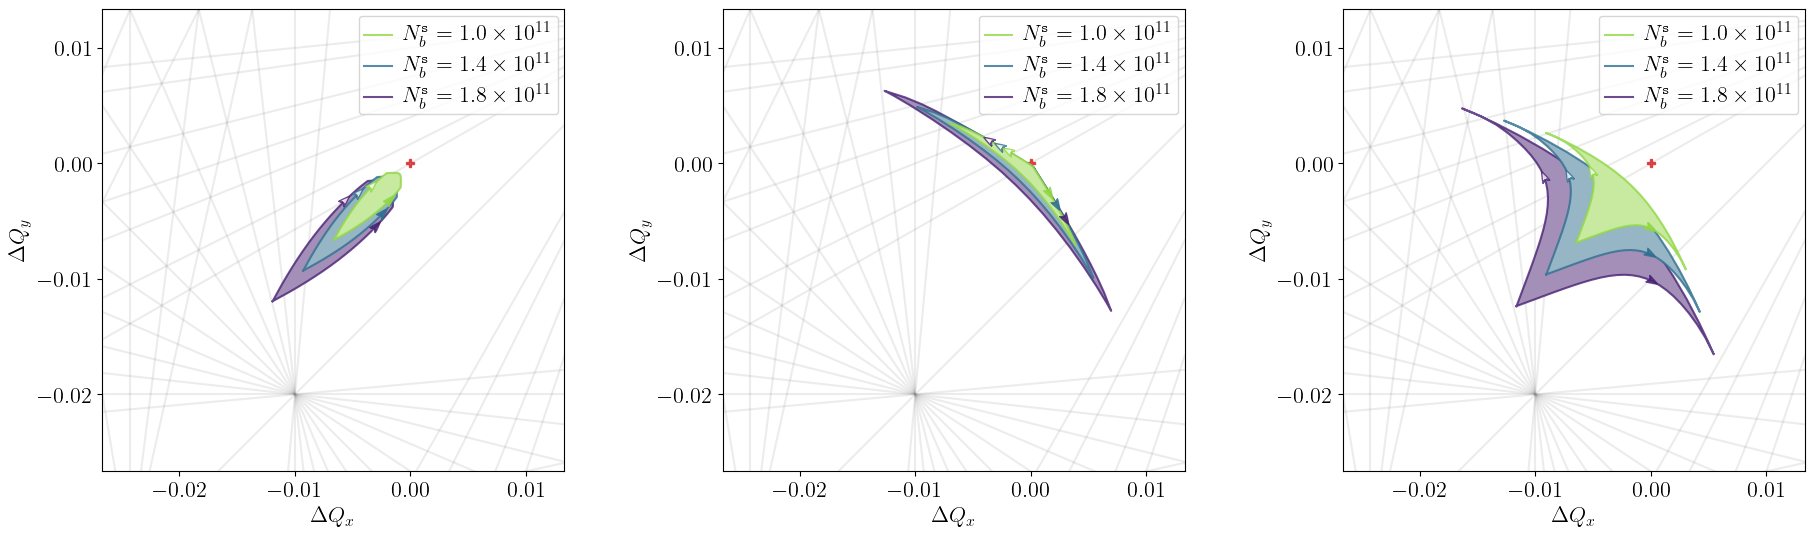

In [26]:


fig, axes = plt.subplots(1, 3,figsize=(3*FIG_W,FIG_H))


for ax,compo in zip(axes,[['HO'],['LR'],['HO','LR']]):

    plt.sca(ax)

    template_FP_plot(window = 0.04)

    # Get dummy color
    sc = plt.scatter([np.nan],[np.nan],c = np.nan,vmin=0.9*1/1.8e11,vmax=1.1*1/1e11,cmap='viridis')

    line_ID = 'base'
    tracked = AllTracked[line_ID]


    for I in [1e11,1.4e11,1.8e11][::-1]:   
        color   = sc.to_rgba(1/I)
        label   = rf'$N_b^\texttt{{\normalsize s}} = {I/1e11:.1f} \times 10^{{11}}$'



        #---------------------------------------------------------
        # Computing footprint
        dQx,dQy = sum_footprints(tracked,components = compo,at_intensity=I)
        dQx,dQy = dQx.loc[tracked['ctour_idx']],dQy.loc[tracked['ctour_idx']]
        
        plt.fill(dQx,dQy,color='w',lw=0,alpha=1,zorder=2)
        plt.fill(dQx,dQy,color=color,lw=0,alpha=0.5,zorder=2)

        plt.plot(dQx,dQy,'-',alpha=0.8,color=color,label=label)

        # Arrows
        start,stop = (len(dQx))//4,(len(dQx))//4+2
        bbplt.drawArrow(dQx.values[start:stop],dQy.values[start:stop],scale=1.3,color=color,alpha=0.8,label = None,zorder=100)
        start,stop = 3*(len(dQx))//4,3*(len(dQx))//4+2
        bbplt.drawArrow(dQx.values[start:stop][::-1],dQy.values[start:stop][::-1],scale=1.3,facecolor='white',color=color,alpha=0.8,label = None,zorder=100)
        #---------------------------------------------------------

        plt.legend()
        reverse_legend()
        adjust_fontsize(fontsize=16)
        plt.locator_params(nbins=6)


adjust_subplots()
plt.savefig('TeX/Figures/Nb_cmp.pdf',bbox_inches='tight',format='pdf')


---
# Comparing xing
---

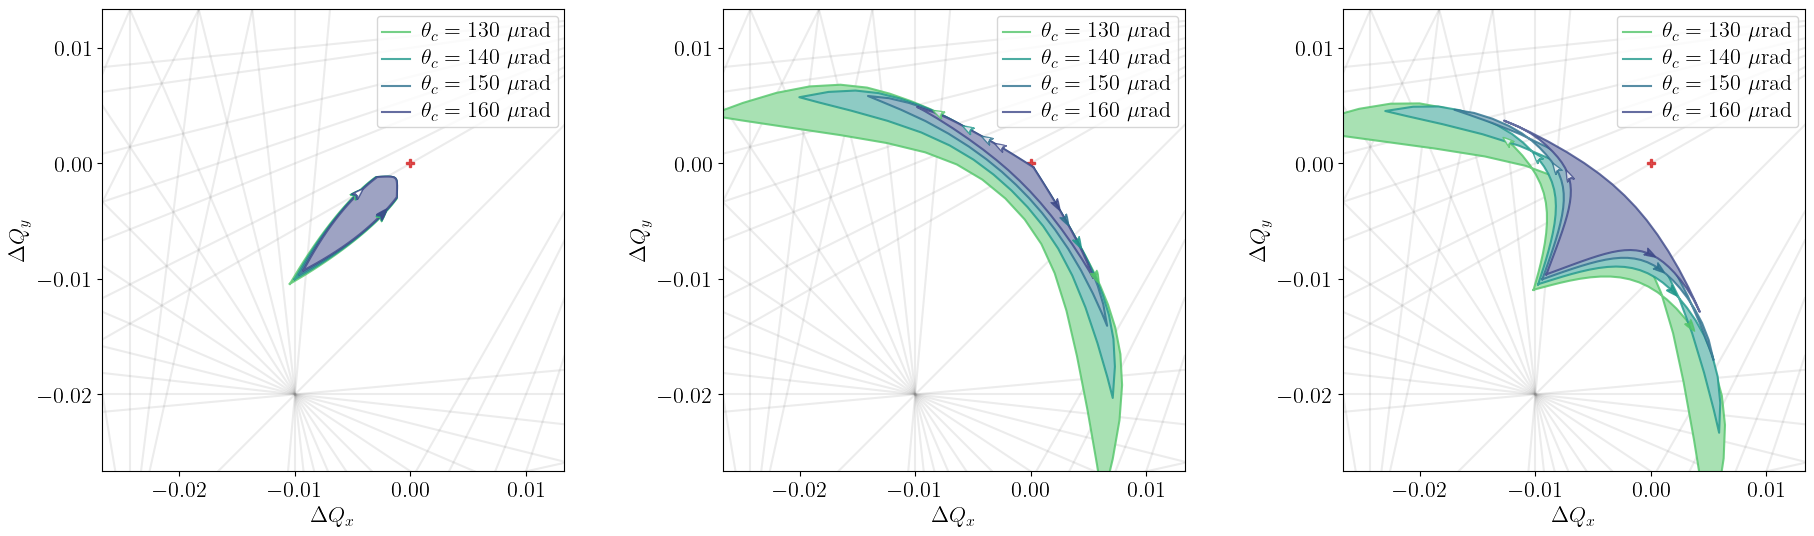

In [24]:



fig, axes = plt.subplots(1, 3,figsize=(3*FIG_W,FIG_H))

for ax,compo in zip(axes,[['HO'],['LR'],['HO','LR']]):

    plt.sca(ax)

    template_FP_plot(window = 0.04)

    # Get dummy color
    sc = plt.scatter([np.nan],[np.nan],c = np.nan,vmin=0.9*1/160,vmax=1.1*1/130,cmap='viridis')

    for line_ID in Allconfigs.index[::-1]:
        if 'xing' not in line_ID:
            continue

        tracked = AllTracked[line_ID]
        color   = sc.to_rgba(1/Allconfigs.loc[line_ID,'xing'])
        label   = rf'$\theta_c = {Allconfigs.loc[line_ID,"xing"]}$ $\mu$rad'



        #---------------------------------------------------------
        # Computing footprint
        dQx,dQy = sum_footprints(tracked,components = compo)
        dQx,dQy = dQx.loc[tracked['ctour_idx']],dQy.loc[tracked['ctour_idx']]
        
        plt.fill(dQx,dQy,color='w',lw=0,alpha=1,zorder=2)
        plt.fill(dQx,dQy,color=color,lw=0,alpha=0.5,zorder=2)

        plt.plot(dQx,dQy,'-',alpha=0.8,color=color,label=label)

        # Arrows
        start,stop = (len(dQx))//4,(len(dQx))//4+2
        bbplt.drawArrow(dQx.values[start:stop],dQy.values[start:stop],scale=1.3,color=color,alpha=0.8,label = None,zorder=100)
        start,stop = 3*(len(dQx))//4,3*(len(dQx))//4+2
        bbplt.drawArrow(dQx.values[start:stop][::-1],dQy.values[start:stop][::-1],scale=1.3,facecolor='white',color=color,alpha=0.8,label = None,zorder=100)
        #---------------------------------------------------------

        plt.legend()
        adjust_fontsize(fontsize=16)
        plt.locator_params(nbins=6)


adjust_subplots()
plt.savefig('TeX/Figures/xing_cmp.pdf',bbox_inches='tight',format='pdf')


---
# Comparing strong beam
---


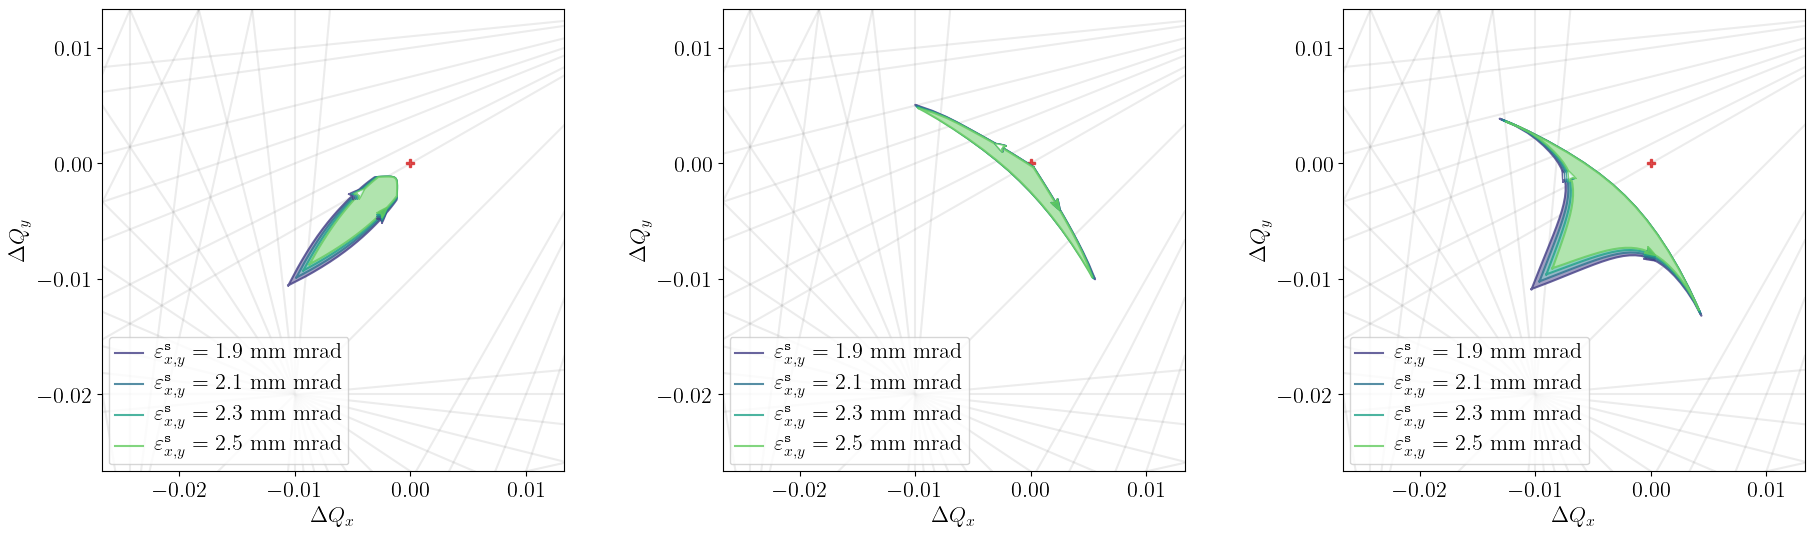

In [6]:



fig, axes = plt.subplots(1, 3,figsize=(3*FIG_W,FIG_H))

for ax,compo in zip(axes,[['HO'],['LR'],['HO','LR']]):

    plt.sca(ax)

    template_FP_plot(window = 0.04)

    # Get dummy color
    sc = plt.scatter([np.nan],[np.nan],c = np.nan,vmin=0.9*1.9,vmax=1.1*2.5,cmap='viridis')

    for line_ID in Allconfigs.index:
        if 'strong' not in line_ID:
            continue

        tracked = AllTracked[line_ID]
        color   = sc.to_rgba(Allconfigs.loc[line_ID,'emitt_strong'])
        label   = rf'$\varepsilon_{{x,y}}^\texttt{{\normalsize s}}  = {Allconfigs.loc[line_ID,"emitt_strong"]}$ mm mrad'



        #---------------------------------------------------------
        # Computing footprint
        dQx,dQy = sum_footprints(tracked,components = compo)
        dQx,dQy = dQx.loc[tracked['ctour_idx']],dQy.loc[tracked['ctour_idx']]
        
        plt.fill(dQx,dQy,color='w',lw=0,alpha=1,zorder=2)
        plt.fill(dQx,dQy,color=color,lw=0,alpha=0.5,zorder=2)

        plt.plot(dQx,dQy,'-',alpha=0.8,color=color,label=label)

        # Arrows
        start,stop = (len(dQx))//4,(len(dQx))//4+2
        bbplt.drawArrow(dQx.values[start:stop],dQy.values[start:stop],scale=1.3,color=color,alpha=0.8,label = None,zorder=100)
        start,stop = 3*(len(dQx))//4,3*(len(dQx))//4+2
        bbplt.drawArrow(dQx.values[start:stop][::-1],dQy.values[start:stop][::-1],scale=1.3,facecolor='white',color=color,alpha=0.8,label = None,zorder=100)
        #---------------------------------------------------------

        plt.legend(loc='lower left')
        adjust_fontsize(fontsize=16)
        plt.locator_params(nbins=6)


adjust_subplots()
plt.savefig('TeX/Figures/emitt_strong_cmp.pdf',bbox_inches='tight',format='pdf')


---
# Comparing emitt_weak
---

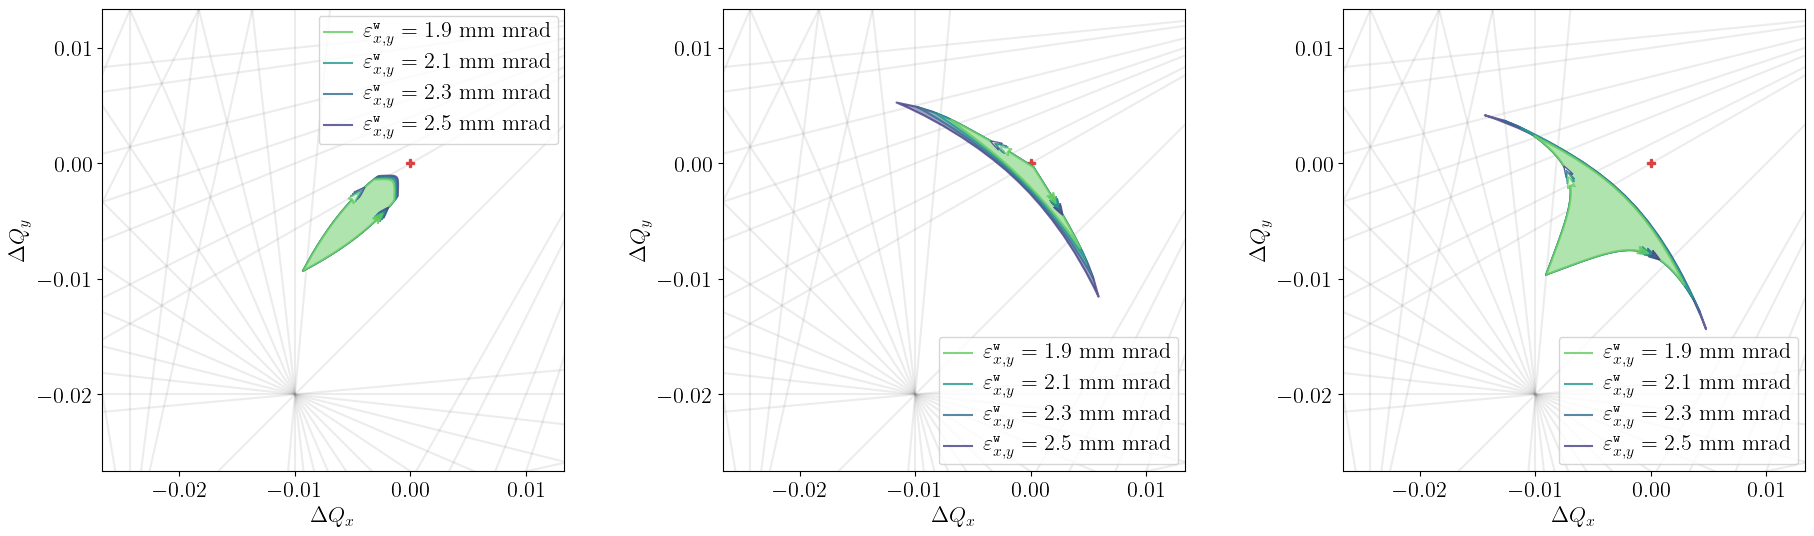

In [9]:



fig, axes = plt.subplots(1, 3,figsize=(3*FIG_W,FIG_H))

for ax,compo in zip(axes,[['HO'],['LR'],['HO','LR']]):

    plt.sca(ax)

    template_FP_plot(window = 0.04)

    # Get dummy color
    sc = plt.scatter([np.nan],[np.nan],c = np.nan,vmin=0.9*1/2.5,vmax=1.1*1/1.9,cmap='viridis')

    for line_ID in Allconfigs.index[::-1]:
        if 'weak' not in line_ID:
            continue

        tracked = AllTracked[line_ID]
        color   = sc.to_rgba(1/Allconfigs.loc[line_ID,'emitt_weak'])
        label   = rf'$\varepsilon_{{x,y}}^\texttt{{\normalsize w}}  = {Allconfigs.loc[line_ID,"emitt_weak"]}$ mm mrad'



        #---------------------------------------------------------
        # Computing footprint
        dQx,dQy = sum_footprints(tracked,components = compo)
        dQx,dQy = dQx.loc[tracked['ctour_idx']],dQy.loc[tracked['ctour_idx']]
        
        plt.fill(dQx,dQy,color='w',lw=0,alpha=1,zorder=2)
        plt.fill(dQx,dQy,color=color,lw=0,alpha=0.5,zorder=2)

        plt.plot(dQx,dQy,'-',alpha=0.8,color=color,label=label)

        # Arrows
        start,stop = (len(dQx))//4,(len(dQx))//4+2
        bbplt.drawArrow(dQx.values[start:stop],dQy.values[start:stop],scale=1.3,color=color,alpha=0.8,label = None,zorder=100)
        start,stop = 3*(len(dQx))//4,3*(len(dQx))//4+2
        bbplt.drawArrow(dQx.values[start:stop][::-1],dQy.values[start:stop][::-1],scale=1.3,facecolor='white',color=color,alpha=0.8,label = None,zorder=100)
        #---------------------------------------------------------

        plt.legend(loc='lower left')
        reverse_legend()
        adjust_fontsize(fontsize=16)
        plt.locator_params(nbins=6)


adjust_subplots()
plt.savefig('TeX/Figures/emitt_weak_cmp.pdf',bbox_inches='tight',format='pdf')


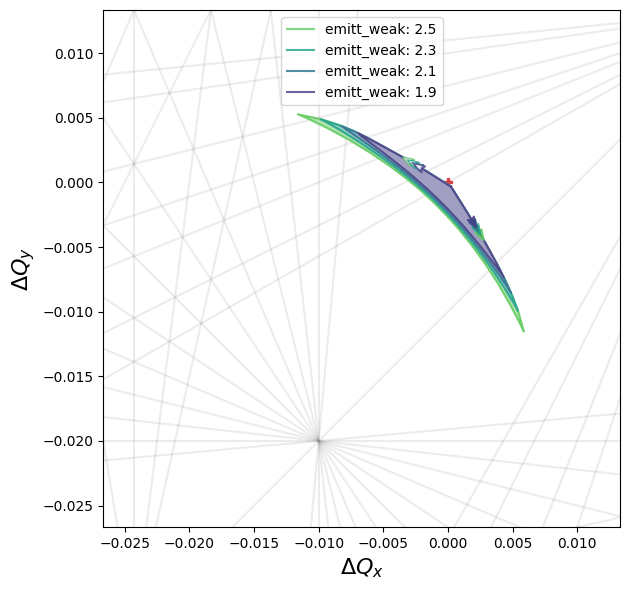

In [68]:

template_FP_plot(window = 0.04)

# Get dummy color
sc = plt.scatter([np.nan],[np.nan],c = np.nan,vmin=0.9*1.9,vmax=1.1*2.5,cmap='viridis')

for line_ID in Allconfigs.index[::-1]:
    if 'weak' not in line_ID:
        continue

    tracked = AllTracked[line_ID]
    color   = sc.to_rgba(Allconfigs.loc[line_ID,'emitt_weak'])
    label   = f'emitt_weak: {Allconfigs.loc[line_ID,"emitt_weak"]}'



    #---------------------------------------------------------
    # Computing footprint
    dQx,dQy = sum_footprints(tracked,components = ['LR'])
    _dQx,_dQy = dQx.loc[tracked['not_co']],dQy.loc[tracked['not_co']]
    #bbplt.polarmesh(_dQx,_dQy,alpha=0.3,r=tracked['coord'].loc[_dQx.index,'r_sig'],theta=tracked['coord'].loc[_dQx.index,'theta_sig'],color=color)
    # plt.scatter(_dQx,_dQy,color=color,s = 30*sciStat.norm.pdf(tracked['coord'].loc[_dQx.index,'r_sig'])/sciStat.norm.pdf(0),zorder=10)

    

    # Plotting contour and Jx/J_y
    dQx,dQy = dQx.loc[tracked['ctour_idx']],dQy.loc[tracked['ctour_idx']]
    #plt.plot(dQx,dQy,'-',alpha=0.8,color=color,label=label)
    plt.fill(dQx,dQy,color='w',alpha=1,zorder=2)
    #bbplt.polarmesh(_dQx,_dQy,alpha=0.1,r=tracked['coord'].loc[_dQx.index,'r_sig'],theta=tracked['coord'].loc[_dQx.index,'theta_sig'],color=color,zorder=2)
    plt.fill(dQx,dQy,color=color,alpha=0.5,zorder=2)
    plt.plot(dQx,dQy,'-',alpha=0.8,color=color,label=label)

    start,stop = (len(dQx)-15)//4,(len(dQx)-15)//4+2
    bbplt.drawArrow(dQx.values[start:stop],dQy.values[start:stop],scale=1.3,color=color,alpha=0.8,label = None,zorder=100)
    start,stop = 3*(len(dQx)-15)//4,3*(len(dQx)-15)//4+2
    bbplt.drawArrow(dQx.values[start:stop][::-1],dQy.values[start:stop][::-1],scale=1.3,facecolor='white',color=color,alpha=0.8,label = None,zorder=100)
    #---------------------------------------------------------

plt.legend()
plt.tight_layout()

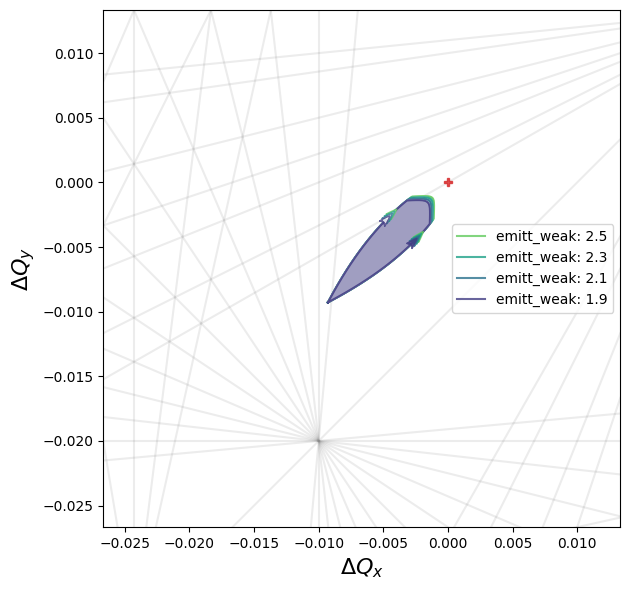

In [71]:

template_FP_plot(window = 0.04)

# Get dummy color
sc = plt.scatter([np.nan],[np.nan],c = np.nan,vmin=0.9*1.9,vmax=1.1*2.5,cmap='viridis')

for line_ID in Allconfigs.index[::-1]:
    if 'weak' not in line_ID:
        continue

    tracked = AllTracked[line_ID]
    color   = sc.to_rgba(Allconfigs.loc[line_ID,'emitt_weak'])
    label   = f'emitt_weak: {Allconfigs.loc[line_ID,"emitt_weak"]}'



    #---------------------------------------------------------
    # Computing footprint
    dQx,dQy = sum_footprints(tracked,components = ['HO'])
    _dQx,_dQy = dQx.loc[tracked['not_co']],dQy.loc[tracked['not_co']]
    #bbplt.polarmesh(_dQx,_dQy,alpha=0.3,r=tracked['coord'].loc[_dQx.index,'r_sig'],theta=tracked['coord'].loc[_dQx.index,'theta_sig'],color=color)
    # plt.scatter(_dQx,_dQy,color=color,s = 30*sciStat.norm.pdf(tracked['coord'].loc[_dQx.index,'r_sig'])/sciStat.norm.pdf(0),zorder=10)

    

    # Plotting contour and Jx/J_y
    dQx,dQy = dQx.loc[tracked['ctour_idx']],dQy.loc[tracked['ctour_idx']]
    #plt.plot(dQx,dQy,'-',alpha=0.8,color=color,label=label)
    plt.fill(dQx,dQy,color='w',alpha=1,zorder=2)
    #bbplt.polarmesh(_dQx,_dQy,alpha=0.1,r=tracked['coord'].loc[_dQx.index,'r_sig'],theta=tracked['coord'].loc[_dQx.index,'theta_sig'],color=color,zorder=2)
    plt.fill(dQx,dQy,color=color,alpha=0.5,zorder=2)
    plt.plot(dQx,dQy,'-',alpha=0.8,color=color,label=label)

    start,stop = (len(dQx)-15)//4,(len(dQx)-15)//4+2
    bbplt.drawArrow(dQx.values[start:stop],dQy.values[start:stop],scale=1.3,color=color,alpha=0.8,label = None,zorder=100)
    start,stop = 3*(len(dQx)-15)//4,3*(len(dQx)-15)//4+2
    bbplt.drawArrow(dQx.values[start:stop][::-1],dQy.values[start:stop][::-1],scale=1.3,facecolor='white',color=color,alpha=0.8,label = None,zorder=100)
    #---------------------------------------------------------

plt.legend()
plt.tight_layout()

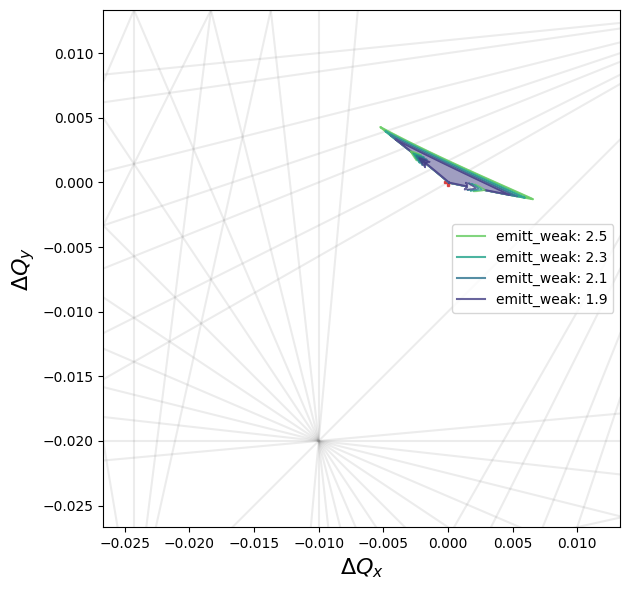

In [72]:

template_FP_plot(window = 0.04)

# Get dummy color
sc = plt.scatter([np.nan],[np.nan],c = np.nan,vmin=0.9*1.9,vmax=1.1*2.5,cmap='viridis')

for line_ID in Allconfigs.index[::-1]:
    if 'weak' not in line_ID:
        continue

    tracked = AllTracked[line_ID]
    color   = sc.to_rgba(Allconfigs.loc[line_ID,'emitt_weak'])
    label   = f'emitt_weak: {Allconfigs.loc[line_ID,"emitt_weak"]}'



    #---------------------------------------------------------
    # Computing footprint
    dQx,dQy = sum_footprints(tracked,components = ['BBCW'])
    _dQx,_dQy = dQx.loc[tracked['not_co']],dQy.loc[tracked['not_co']]
    #bbplt.polarmesh(_dQx,_dQy,alpha=0.3,r=tracked['coord'].loc[_dQx.index,'r_sig'],theta=tracked['coord'].loc[_dQx.index,'theta_sig'],color=color)
    # plt.scatter(_dQx,_dQy,color=color,s = 30*sciStat.norm.pdf(tracked['coord'].loc[_dQx.index,'r_sig'])/sciStat.norm.pdf(0),zorder=10)

    

    # Plotting contour and Jx/J_y
    dQx,dQy = dQx.loc[tracked['ctour_idx']],dQy.loc[tracked['ctour_idx']]
    #plt.plot(dQx,dQy,'-',alpha=0.8,color=color,label=label)
    plt.fill(dQx,dQy,color='w',alpha=1,zorder=2)
    #bbplt.polarmesh(_dQx,_dQy,alpha=0.1,r=tracked['coord'].loc[_dQx.index,'r_sig'],theta=tracked['coord'].loc[_dQx.index,'theta_sig'],color=color,zorder=2)
    plt.fill(dQx,dQy,color=color,alpha=0.5,zorder=2)
    plt.plot(dQx,dQy,'-',alpha=0.8,color=color,label=label)

    start,stop = (len(dQx)-15)//4,(len(dQx)-15)//4+2
    bbplt.drawArrow(dQx.values[start:stop],dQy.values[start:stop],scale=1.3,color=color,alpha=0.8,label = None,zorder=100)
    start,stop = 3*(len(dQx)-15)//4,3*(len(dQx)-15)//4+2
    bbplt.drawArrow(dQx.values[start:stop][::-1],dQy.values[start:stop][::-1],scale=1.3,facecolor='white',color=color,alpha=0.8,label = None,zorder=100)
    #---------------------------------------------------------

plt.legend()
plt.tight_layout()

In [79]:
for weak,numID in zip([1.9e-6,2.1e-6,2.3e-6,2.5e-6],['01','02','03','04']):

        emitt_x = weak
        emitt_y = weak
        line_ID = f'base_weak_{numID}'
        print(line_ID,emitt_x,emitt_y)

base_weak_01 1.9e-06 1.9e-06
base_weak_02 2.1e-06 2.1e-06
base_weak_03 2.3e-06 2.3e-06
base_weak_04 2.5e-06 2.5e-06
